# Content
* Imported Libraries
* Constants
* The Region
* Domain Category
* Research Question
* Dataset Description
* Data Cleaning
* Visual explanation
* Discussion

# Imported Libraries

In [93]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib notebook
plt.style.use('seaborn-colorblind')

# Constants

In [56]:
data_dir = 'data'
usa_crime_file = os.path.join(data_dir, 'usa_crimes.csv')
dw_crime_file  = os.path.join(data_dir, 'deleware_crimes.csv')
inf_file  = os.path.join(data_dir, 'inflation_rates.csv')
gdp_file   = os.path.join(data_dir, 'gdp_rates.csv') 

# The Region

__Delaware, United States__ <br>
Delaware is one of the 50 states of the United States, in the South-Atlantic or Southern region. It is bordered to the south and west by Maryland, north by Pennsylvania, and east by New Jersey and the Atlantic Ocean. The state takes its name from Thomas West, 3rd Baron De La Warr, an English nobleman and Virginia's first colonial governor.
![Crime_Photo](imgs/delaware.PNG)

# Domain Category

__Crime__ <br>
In ordinary language, a crime is an unlawful act punishable by a state or other authority. The term "crime" does not, in modern criminal law, have any simple and universally accepted definition, though statutory definitions have been provided for certain purposes. The most popular view is that crime is a category created by law; in other words, something is a crime if declared as such by the relevant and applicable law. One proposed definition is that a crime or offence (or criminal offence) is an act harmful not only to some individual but also to a community, society or the state ("a public wrong"). Such acts are forbidden and punishable by law.
![Crime_Photo](imgs/crimes_image.jpg)

# Research Question

How have violent crime rates for Delaware have changed over the last five decades, in comparison with the accumulated crime rate in all states of the United State?

# Datasets Description

First two datasets are about crime rates in USA and Delaware. These datasets are extracted from [this website](https://www.ucrdatatool.gov/Search/Crime/State/StatebyState.cfm).

In [3]:
print('Delaware Crime rate dataset file: ',os.listdir(data_dir)[0])
print('USA Crime rate dataset file: ',os.listdir(data_dir)[3])

Delaware Crime rate dataset file:  deleware_crimes.csv
USA Crime rate dataset file:  usa_crimes.csv


# Data Cleaning

### USA Crime Dataset

In [27]:
usa_crime_dataset = pd.read_csv(usa_crime_file, header=None, skiprows=[0, 1, 2, 3] + list(range(65, 83)) )
usa_crime_header = usa_crime_dataset.iloc[:2]
usa_crime_header

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,NaN,National or state crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Violent crime,NaN,NaN,NaN,NaN,NaN,Property crime,NaN,...,NaN,NaN,NaN,NaN,Property crime,NaN,NaN,NaN,NaN,NaN


In [34]:
usa_crime_data = usa_crime_dataset.iloc[2:]
new_header = usa_crime_data.iloc[0] 
usa_crime_data = usa_crime_data.iloc[1:] 
usa_crime_data.columns = new_header 
usa_crime_data = usa_crime_data.set_index('Year')
usa_crime_data.head()

2,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,...,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,nan,nan
Year,,,,,,,,,,,,,,,,,,,,,
1960,179323175,288460,9110,17190,NaN,107840,154320,3095700,912100,1855400,...,9.6,NaN,60.1,86.1,1726.3,508.6,1034.7,183.0,NaN,NaN
1961,182992000,289390,8740,17220,NaN,106670,156760,3198600,949600,1913000,...,9.4,NaN,58.3,85.7,1747.9,518.9,1045.4,183.6,NaN,NaN
1962,185771000,301510,8530,17550,NaN,110860,164570,3450700,994300,2089600,...,9.4,NaN,59.7,88.6,1857.5,535.2,1124.8,197.4,NaN,NaN
1963,188483000,316970,8640,17650,NaN,116470,174210,3792500,1086400,2297800,...,9.4,NaN,61.8,92.4,2012.1,576.4,1219.1,216.6,NaN,NaN
1964,191141000,364220,9360,21420,NaN,130390,203050,4200400,1213200,2514400,...,11.2,NaN,68.2,106.2,2197.5,634.7,1315.5,247.4,NaN,NaN


In [41]:
usa_crime_rate = usa_crime_data['Violent Crime rate'].astype(np.float64) # Crime rate per 100,000 population
usa_crime_rate.head(5)

Year
1960    160.9
1961    158.1
1962    162.3
1963    168.2
1964    190.6
Name: Violent Crime rate, dtype: float64

### Delaware Crime Dataset

In [42]:
dw_crime_dataset = pd.read_csv(dw_crime_file, header=None, skiprows=[0, 1, 2, 3] + list(range(65, 83)) )
dw_crime_header = dw_crime_dataset.iloc[:2]
dw_crime_header

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,NaN,National or state crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Violent crime,NaN,NaN,NaN,NaN,NaN,Property crime,NaN,...,NaN,NaN,NaN,NaN,Property crime,NaN,NaN,NaN,NaN,NaN


In [43]:
dw_crime_data = dw_crime_dataset.iloc[2:]
new_header = dw_crime_data.iloc[0]
dw_crime_data = dw_crime_data.iloc[1:] 
dw_crime_data.columns = new_header 
dw_crime_data = dw_crime_data.set_index('Year')
dw_crime_data.head()

2,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,...,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,nan,nan
Year,,,,,,,,,,,,,,,,,,,,,
1960,446292,375,33,41,NaN,157,144,9267,2661,5867,...,9.2,NaN,35.2,32.3,2076.4,596.2,1314.6,165.6,NaN,NaN
1961,458000,318,20,27,NaN,124,147,9343,2711,5885,...,5.9,NaN,27.1,32.1,2040.0,591.9,1284.9,163.1,NaN,NaN
1962,469000,338,20,44,NaN,140,134,10157,2814,6479,...,9.4,NaN,29.9,28.6,2165.7,600.0,1381.4,184.2,NaN,NaN
1963,476000,424,24,43,NaN,181,176,10892,3366,6559,...,9.0,NaN,38.0,37.0,2288.2,707.1,1377.9,203.2,NaN,NaN
1964,491000,541,23,40,NaN,203,275,11801,3313,7211,...,8.1,NaN,41.3,56.0,2403.5,674.7,1468.6,260.1,NaN,NaN


In [45]:
dw_crime_rate = dw_crime_data['Violent Crime rate'].astype(np.float64) # Crime rate per 100,000 population
dw_crime_rate.head(5)

Year
1960     84.0
1961     69.4
1962     72.1
1963     89.1
1964    110.2
Name: Violent Crime rate, dtype: float64

# Visual Explanation

<IPython.core.display.Javascript object>


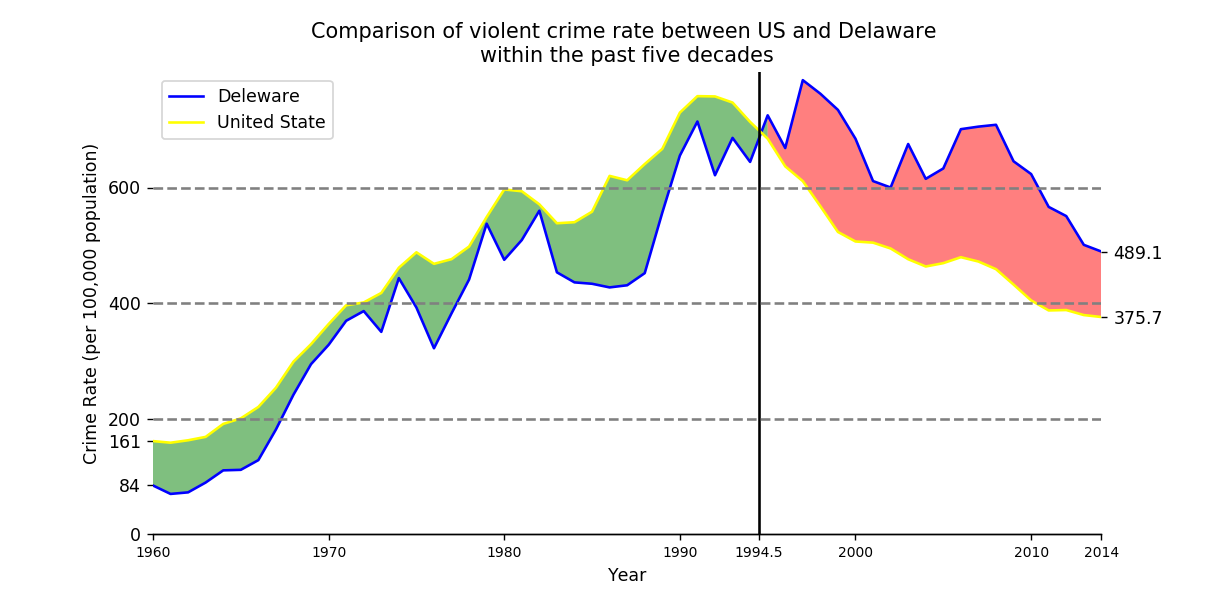

In [221]:
f = plt.figure()
ax1 = f.add_subplot(111)
x_axis = np.arange(1960, 2015).astype(int)
ax1.plot(x_axis, dw_crime_rate.values, color='blue', label="Deleware")
ax1.plot(x_axis, usa_crime_rate.values, color='yellow', label="United State")
ax1.fill_between(np.arange(1960, 1996).astype(int), dw_crime_rate.values[:36], usa_crime_rate.values[:36], facecolor='green', alpha=0.5)
ax1.fill_between(np.arange(1995, 2015).astype(int), dw_crime_rate.values[35:], usa_crime_rate.values[35:], facecolor='red', alpha=0.5)
plt.title('Comparison of violent crime rate between US and Delaware \nwithin the past five decades')
plt.axis([1960,2014,0,800])
plt.xlabel('Year')
plt.ylabel('Crime Rate (per 100,000 population)')
xticks = list(range(1960, 1995, 10)) + [1994.5] + list(range(2000, 2015, 10)) + [2014]
plt.xticks(xticks, [str(year) for year in xticks], rotation=0, fontsize=8)
plt.yticks([0, dw_crime_rate.values[0], usa_crime_rate.values[0]]+list(range(200,601,200)), rotation=0, fontsize=10)

plt.axvline(x=1994.5, color='black', linestyle='-')
plt.axhline(y=200, color='gray', linestyle='--')
plt.axhline(y=400, color='gray', linestyle='--')
plt.axhline(y=600, color='gray', linestyle='--')
plt.legend(loc='best')


ax1.spines['top'].set_visible(False)
ax2 = ax1.twinx()
ax2.set_ylim(0,800)
ax2.set_yticks([dw_crime_rate.values[-1]]+[usa_crime_rate.values[-1]])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Discussion

The provided figure illustrates that in 1960, crime-rate (per 100,000 population) in both US and Delaware started at 84 and 161, respectively; Then, they strengthened irregularly until reached their peak, approximately at 1990 and 1998; at last, crime-rate in US and Delaware abated until they, respectively, finished in 375.7 and 489.1, in 2014. It is good to mention that both regions experienced a lot of fluctuations in crime-rate, from 1960 to 2014; and also, they approximately followed the same trends, during these years.
<br>
As shown, from 1960 to 1994,  accumulated crime-rate in all states of the US was higher than Delaware; whereas, after 1994, till 2014, crime-rate in Deleware overtaken the crime-rate in the US. Also, in 2014, crime-rate of Delaware was noticeably higher than crime-rate in the US. In conclusion, crime-rate both in the US and Delaware followed the same trends, from 1960 to 2014; and crime-rate in Delaware was lower than the US, in 1960; however, it passed the crime-rate in the US in 1995 and ended up with much more crime-rate in 2014.

__Explaining Cairo’s principles of truth, beauty, function, and insight, in our visualization:__

Concerning truthfulness, I should say: firstly, both datasets are extracted from a reliable website named https://www.ucrdatatool.gov provided by the FBI; secondly, both data cleaning and data visualization step have done carefully, and data from both datasets are in the same scale (crime-rate per 100,000 population). <br>
Regarding functionality, we employed a vertical line along with different shadows between plots to make the comparison of crime-rate in two regions easier. <br>
Apropos beauty, we used different colors, with having general audiences in mind, to illustrate the comparison between the period that Deleware crime-rate was lower than US crime-rate. For clarification, a green shadow between the period which Deleware crime-rate was lower than US crime-rate is employed and a red shadow vice versa. As these colors are familiar to general audiences, it is easier for them to understand these distinct eras (improving functionality), and these are the colors which general audiences probably like. <br>
At last, we addressed insightfulness, using shadows, labels for starting and finishing point of both plots, and a vertical line which help us to compare crime-rate in both regions, at first glance. <br>